In [1]:
!pip install opencv-python

In [3]:
!pip install scikit-learn
!pip install xlwt xlrd xlutils
!pip install matplotlib
!pip install opencv-python


  Using cached matplotlib-3.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp311-cp311-macosx_10_9_universal2.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.3 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.4 MB/s eta 0:00:00a 0:00:01


In [3]:
# import cv2
# import os


# def assure_path_exists(path):
#     dir = os.path.dirname(path)
#     if not os.path.exists(dir):
#         os.makedirs(dir)


# face_id = input("Enter Your ID: ")
# # Start capturing video
# vid_cam = cv2.VideoCapture(0)

# # Detect object in video stream using Haarcascade Frontal Face
# face_detector = cv2.CascadeClassifier("model/haarcascade_frontalface_default.xml")

# # Initialize sample face image
# count = 0

# assure_path_exists("G:/Projects/Image Processing/Attendance System/dataset/")

# # Start looping
# while True:

#     # Capture video frame
#     _, image_frame = vid_cam.read()

#     # Convert frame to grayscale
#     gray = cv2.cvtColor(image_frame, cv2.COLOR_BGR2GRAY)

#     # Detect frames of different sizes, list of faces rectangles
#     faces = face_detector.detectMultiScale(gray, 1.3, 5)

#     # Loops for each faces
#     for (x, y, w, h) in faces:
#         # Crop the image frame into rectangle
#         cv2.rectangle(image_frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

#         # Increment sample face image
#         count += 1

#         # Save the captured image into the datasets folder
#         cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y + h, x:x + w])

#         # Display the video frame, with bounded rectangle on the person's face
#         cv2.imshow('frame', image_frame)

#     # To stop taking video, press 'q' for at least 100ms
#     if cv2.waitKey(100) & 0xFF == ord('q'):
#         break

#     # If image taken reach 50, stop taking video
#     elif count >= 50:
#         print("Successfully Captured")
#         break

# # Stop video
# vid_cam.release()

# # Close all started windows
# cv2.destroyAllWindows()


In [8]:
# Load and preprocess the data

import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split

# Path to dataset
DATASET_PATH = 'dataset'

# Initialize data and labels
data = []
labels = []

# Create a list to store user IDs
user_ids = []

# Load images and labels
for image_name in os.listdir(DATASET_PATH):
    image_path = os.path.join(DATASET_PATH, image_name)
    
    # Only process images that match the pattern (e.g., User.1.1.jpg)
    if image_name.startswith("User") and image_name.endswith(".jpg"):
        # Extract the user ID from the filename (e.g., "User.1.1.jpg" → "1")
        user_id = image_name.split('.')[1]
        
        # Add user ID to the list if not already present
        if user_id not in user_ids:
            user_ids.append(user_id)
        
        # Get the label index (based on the position in the user_ids list)
        label_index = user_ids.index(user_id)
        
        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = cv2.resize(image, (100, 100))            # Resize to (100, 100)
        image = img_to_array(image)                      # Convert to array
        
        # Append image data and label
        data.append(image)
        labels.append(label_index)

# Convert to NumPy arrays and normalize
data = np.array(data, dtype='float32') / 255.0
labels = np.array(labels)

# One-hot encode labels
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Debugging output
print(f"Total images: {len(data)}")
print(f"Number of unique users (classes): {num_classes}")
print(f"User IDs mapped to labels: {user_ids}")


Total images: 200
Number of unique users (classes): 4
User IDs mapped to labels: ['3', '4', '1', '2']


In [9]:
# Build the CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)

# Build CNN model
model = Sequential([
    # Input layer
    Input(shape=(100, 100, 1)),

    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 batch_normalization_3 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 50, 50, 64)       256       
 hNormalization)                                                 
                                                        

In [10]:

# Train the model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training set
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Fit the generator on the training data
datagen.fit(x_train)

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=30),
    validation_data=(x_test, y_test),
    epochs=20
)

# Save the trained model
model.save('cnn_face_recognition_model.h5')
print("Model saved successfully!")



Epoch 1/20


2024-12-11 22:35:57.237960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-12-11 22:35:57.263696: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 1s 124ms/step - loss: 7.6311 - accuracy: 0.4563 - val_loss: 1.2444 - val_accuracy: 0.4750
Epoch 2/20
6/6 [==============================] - 1s 109ms/step - loss: 3.7080 - accuracy: 0.6875 - val_loss: 2.2227 - val_accuracy: 0.3000
Epoch 3/20
6/6 [==============================] - 1s 108ms/step - loss: 1.6692 - accuracy: 0.8625 - val_loss: 4.1437 - val_accuracy: 0.3000
Epoch 4/20
6/6 [==============================] - 1s 107ms/step - loss: 0.6722 - accuracy: 0.8813 - val_loss: 6.3047 - val_accuracy: 0.3000
Epoch 5/20
6/6 [==============================] - 1s 118ms/step - loss: 0.7031 - accuracy: 0.8875 - val_loss: 8.5455 - val_accuracy: 0.3000
Epoch 6/20
6/6 [==============================] - 1s 111ms/step - loss: 0.3843 - accuracy: 0.9187 - val_loss: 10.6907 - val_accuracy: 0.3000
Epoch 7/20
6/6 [==============================] - 1s 133ms/step - loss: 0.1344 - accuracy: 0.9625 - val_loss: 12.7100 - val_accuracy: 0.3000
Epoch 8/20
6/6 [=============

Epoch 1/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0681 - accuracy: 0.9667

2024-12-11 22:36:31.381256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


6/6 [==============================] - 1s 113ms/step - loss: 0.2195 - accuracy: 0.9688 - val_loss: 21.9282 - val_accuracy: 0.3000
Epoch 2/20
6/6 [==============================] - 1s 107ms/step - loss: 0.1103 - accuracy: 0.9750 - val_loss: 22.0787 - val_accuracy: 0.3000
Epoch 3/20
6/6 [==============================] - 1s 126ms/step - loss: 0.0891 - accuracy: 0.9875 - val_loss: 21.8852 - val_accuracy: 0.3000
Epoch 4/20
6/6 [==============================] - 1s 124ms/step - loss: 0.0966 - accuracy: 0.9875 - val_loss: 22.5790 - val_accuracy: 0.3000
Epoch 5/20
6/6 [==============================] - 1s 132ms/step - loss: 0.2178 - accuracy: 0.9812 - val_loss: 22.7392 - val_accuracy: 0.3000
Epoch 6/20
6/6 [==============================] - 1s 109ms/step - loss: 0.1198 - accuracy: 0.9875 - val_loss: 22.8122 - val_accuracy: 0.3000
Epoch 7/20
6/6 [==============================] - 1s 117ms/step - loss: 0.1869 - accuracy: 0.9750 - val_loss: 22.3454 - val_accuracy: 0.3000
Epoch 8/20
6/6 [========

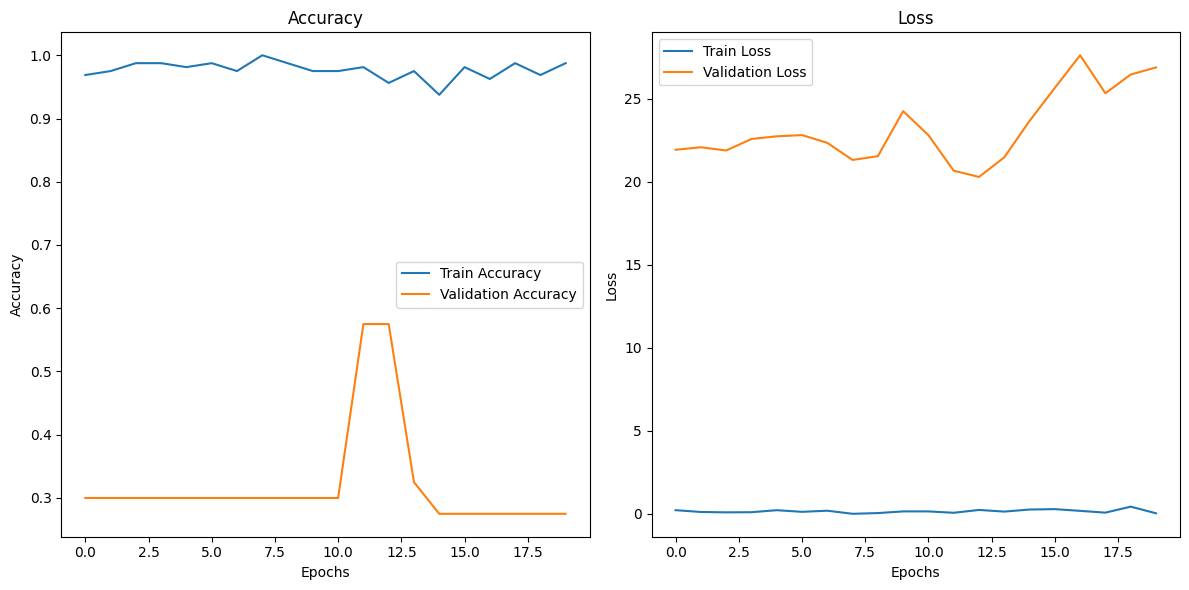

In [11]:
import matplotlib.pyplot as plt


history = model.fit(
    datagen.flow(x_train, y_train, batch_size=30),
    validation_data=(x_test, y_test),
    epochs=20
)


# Get accuracy and loss from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


2/2 [==============================] - 0s 15ms/step - loss: 26.8871 - accuracy: 0.2750
Test Accuracy: 27.50%


In [7]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from datetime import datetime
import xlwt
from xlrd import open_workbook
from xlutils.copy import copy
from pathlib import Path


# Define the output function for recording attendance
def output(filename, sheet, num, name, present):
    # Ensure the directory exists
    Path("attendance_sheet").mkdir(exist_ok=True)

    # Define the file path
    file_path = Path(f"attendance_sheet/{filename}{datetime.now().date()}.xls")

    if file_path.is_file():
        # Open the existing file
        rb = open_workbook(file_path)
        book = copy(rb)
        sh = book.get_sheet(0)

        # Check if the date is already written in the first cell
        try:
            first_cell_value = rb.sheet_by_index(0).cell_value(0, 0)
        except IndexError:
            first_cell_value = None
    else:
        # Create a new workbook and sheet
        book = xlwt.Workbook()
        sh = book.add_sheet(sheet)
        first_cell_value = None

        # Add headers for new sheets
        style_header = xlwt.easyxf('font: name Times New Roman, color-index red, bold on')
        sh.write(1, 0, "Name", style_header)
        sh.write(1, 1, "Present", style_header)

    # Write the date if not already written
    if not first_cell_value:
        style_date = xlwt.easyxf(num_format_str='D-MMM-YY')
        sh.write(0, 0, datetime.now().date(), style_date)

    # Check for duplicates in the attendance list
    if file_path.is_file():
        rb_sheet = rb.sheet_by_index(0)
        existing_names = [rb_sheet.cell_value(row, 0) for row in range(2, rb_sheet.nrows)]
    else:
        existing_names = []

    if name not in existing_names:
        # Write attendance data
        sh.write(num + 1, 0, name)
        sh.write(num + 1, 1, present)

    # Save the workbook
    fullname = file_path.as_posix()
    book.save(fullname)
    return fullname


# Load the trained model
model = load_model('cnn_face_recognition_model.h5')

# Load Haarcascade classifier for face detection
face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')

# Label names (matching the user_id order)
label_names = ['Tanzim', 'Nayeem', 'Raiyan', 'Alvee']  # Correct mapping based on your folder structure
user_id_map = {'Tanzim': 1, 'Nayeem': 2, 'Raiyan': 3, 'Alvee': 4}  # Map names to user IDs

# Capture video from webcam
cap = cv2.VideoCapture(0)

# Counter for attendance row in Excel
num = 2  # Start from row 2 to avoid overwriting headers

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # List to store face regions and bounding boxes
    face_boxes = []
    face_regions = []

    # Collect bounding boxes and regions
    for (x, y, w, h) in faces:
        face_boxes.append((x, y, x + w, y + h))
        roi = gray[y:y + h, x:x + w]
        roi = cv2.resize(roi, (100, 100))
        roi = roi.astype('float32') / 255.0
        roi = np.expand_dims(roi, axis=0)
        roi = np.expand_dims(roi, axis=-1)
        face_regions.append(roi)

    # Ensure the number of faces matches the number of predictions
    for i, (box, roi) in enumerate(zip(face_boxes, face_regions)):
        (x1, y1, x2, y2) = box

        # Predict the face
        preds = model.predict(roi)
        predicted_class = np.argmax(preds)
        confidence = np.max(preds) * 100

        # Handle out-of-range predictions
        if predicted_class < len(label_names):
            label = label_names[predicted_class]
        else:
            label = "Unknown"

        # Draw rectangle and label on the frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"{label}: {confidence:.2f}%", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Mark attendance in the Excel file
        if label != "Unknown":
            output('attendance_', 'Sheet1', num, label, "Present")
            num += 1  # Move to the next row for each recognized person

    # Display the frame
    cv2.imshow('Face Recognition', frame)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 11ms/step


2024-12-11 22:14:16.728 python[40681:393252] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-11 22:14:16.728 python[40681:393252] +[IMKInputSession subclass]: chose IMKInputSession_Modern


1/1 [==============================] - 0s 10ms/step


KeyboardInterrupt: 